<a href="https://colab.research.google.com/github/AnnaDingillo/Master-Data-Science/blob/main/Progetto_Fondamenti_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto di Fondamenti di ML

# il dataset

Il cliente è una compagnia di assicurazioni che ha fornito un'assicurazione sanitaria ai suoi clienti, adesso hanno bisogno di costruire un modello predittivo in grado di prevedere se gli assicurati dell'anno passato potrebbero essere interessati ad acquistare anche un'assicurazione per il proprio veicolo.

l dataset è composto dalle seguenti proprietà:

- id: id univoco dell'acquirente.
- Gender: sesso dell'acquirente.
- Age: età dell'acquirente.
- Driving_License: 1 se l'utente ha la patente di guida, 0 altrimenti.
- Region_Code: codice univoco della regione dell'acquirente.
- Previously_Insured: 1 se l'utente ha già un veicolo assicurato, 0 altrimenti.
- Vehicle_Age: età del veicolo
- Vehicle_Damage: 1 se l'utente ha danneggiato il veicolo in passato, 0 altrimenti.
- Annual_Premium: la cifra che l'utente deve pagare come premio durante l'anno.
- Policy_Sales_Channel: codice anonimizzato del canale utilizzato per la proposta (es. per email, per telefono, di persona, ecc...)
- Vintage: numero di giorni dalla quale l'utente è cliente dell'azienda.
- Response: 1 se l'acquirente ha risposto positivametne alla proposta di vendità, 0 altrimenti.

**L'obiettivo del modello è prevedere il valore di Response.**

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/insurance_cross_sell.csv'
df = pd.read_csv(URL, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [3]:
print("Shape:", df.shape)
print("Colonne:", df.columns.tolist())
df.head(10)

Shape: (381109, 11)
Colonne: ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0


In [4]:
TARGET = "Response"

# Missing per colonna, in valore assoluto e in %
na_cnt = df.isnull().sum()
na_pct = na_cnt/df.shape[0]
missing_table = pd.DataFrame({"missing": na_cnt, "missing_%": na_pct})
print("no missing values \n" if na_cnt.sum() == 0 else print(na_pct.sort_values().plot(kind='bar')))

#righe duplicate
dup_all = df.drop(columns=[TARGET]).duplicated(keep=False) #Keep=False - tutte le righe coinvolte nei duplicati (anche prime occorrenze del gruppo duplicato)
print(f"Tutte le righe con duplicati (keep=False) - conteggio: {dup_all.sum()}, in % su tot: {(dup_all.sum()/df.shape[0])*100:.2f}%")

no missing values 

Tutte le righe con duplicati (keep=False) - conteggio: 643, in % su tot: 0.17%


In [5]:
df.describe(percentiles=[0.05,0.10,0.50,0.95])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
5%,21.000000,1.000000,5.000000,0.000000,2630.000000,26.000000,24.000000,0.000000
10%,22.000000,1.000000,8.000000,0.000000,2630.000000,26.000000,38.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
95%,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413



Distribuzione target:
Response
0    0.877
1    0.123
Name: proportion, dtype: float64


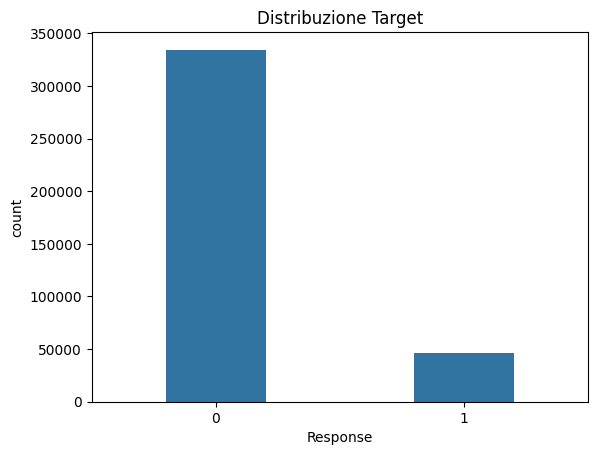

In [7]:
TARGET = "Response" #variabile target da prevedere

print("\nDistribuzione target:")
print(df[TARGET].value_counts(normalize=True).round(3)) #otteniamo le proporzioni relative (non solo conteggi)

sns.countplot(x=TARGET, data=df, width=0.4)
plt.title("Distribuzione Target")
plt.show()

La variabile target presenta una distribuzione fortemente sbilanciata: circa l’88% degli assicurati appartiene alla classe negativa (nessuna risposta) e solo il 12% alla classe positiva (risposta). Questo significa che l’uso della sola accuracy non è sufficiente come metrica di valutazione, perché un modello che predice sempre la classe maggioritaria raggiungerebbe comunque un’accuratezza molto alta ma senza capacità predittiva utile.

In [8]:
# Indentificiamo le variabili quantitative e qualitative:

num_cols = ['Age', 'Annual_Premium', 'Vintage']
cat_cols = []


for col in df.columns:
    if col == TARGET or col in num_cols:
        # salto la colonna target
        continue
    else:
        cat_cols.append(col)

print("Numero di colonne numeriche:", len(num_cols))
print("Colonne numeriche:", num_cols,"\n")

print("Numero di colonne categoriche:", len(cat_cols))
print("Colonne categoriche:", cat_cols, "\n")


Numero di colonne numeriche: 3
Colonne numeriche: ['Age', 'Annual_Premium', 'Vintage'] 

Numero di colonne categoriche: 7
Colonne categoriche: ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel'] 



## Analisi Univariata (variabili numeriche)

                   count          mean           std     min      25%  \
Age             381109.0     38.822584     15.511611    20.0     25.0   
Annual_Premium  381109.0  30564.389581  17213.155057  2630.0  24405.0   
Vintage         381109.0    154.347397     83.671304    10.0     82.0   

                    50%      75%       max  
Age                36.0     49.0      85.0  
Annual_Premium  31669.0  39400.0  540165.0  
Vintage           154.0    227.0     299.0  


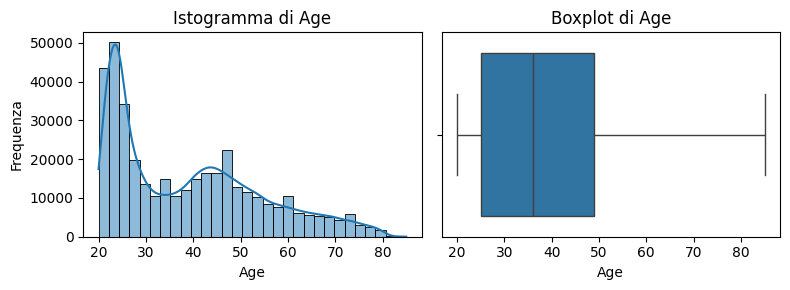

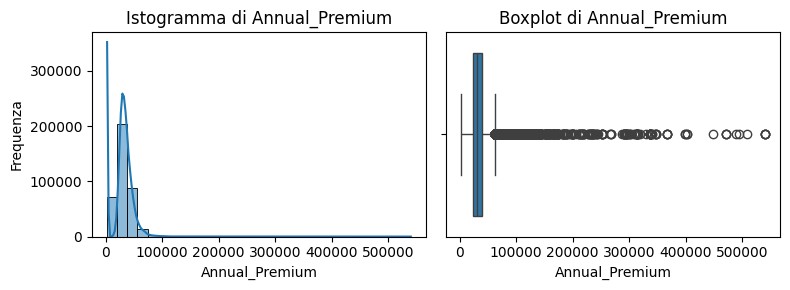

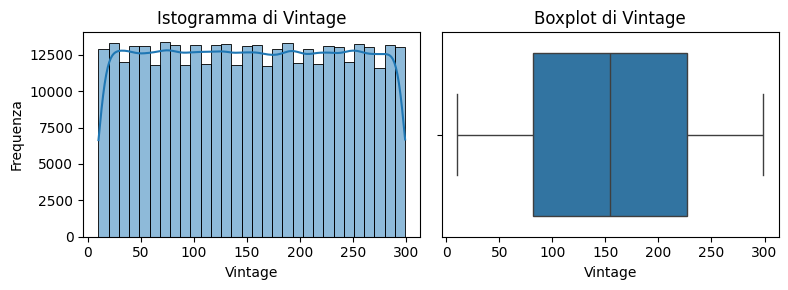

'\nfor col in num_cols:\n    fig, axes = plt.subplots(1, 2, figsize=(12,4))\n    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[0], color="steelblue")\n    axes[0].set_title(f"Istogramma di {col}")\n    sns.boxplot(x=df[col], ax=axes[1], color="lightgreen")\n    axes[1].set_title(f"Boxplot di {col}")\n    plt.show()\n'

In [9]:
print(df[num_cols].describe().T)

for col in num_cols:
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=col, kde = True, bins=30)
    plt.title(f"Istogramma di {col}")
    plt.xlabel(col)
    plt.ylabel("Frequenza")

    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot di {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


#versione difficile
'''
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[0], color="steelblue")
    axes[0].set_title(f"Istogramma di {col}")
    sns.boxplot(x=df[col], ax=axes[1], color="lightgreen")
    axes[1].set_title(f"Boxplot di {col}")
    plt.show()
'''

## Analisi Univariata (variabili categoriche)

        Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413 


Gender
Male      0.540761
Female    0.459239
Name: proportion, dtype: float64


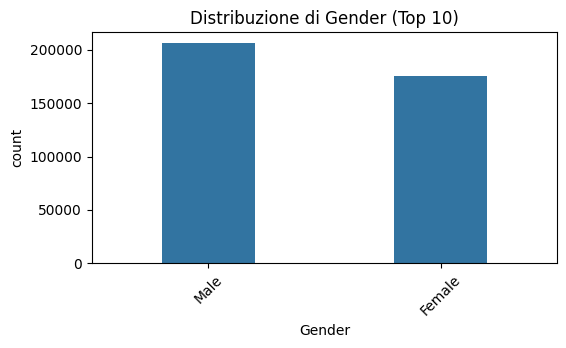

Driving_License
1    0.997869
0    0.002131
Name: proportion, dtype: float64


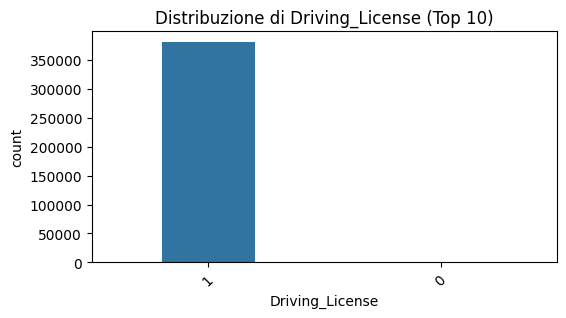

Region_Code
28.0    0.279225
8.0     0.088891
46.0    0.051820
41.0    0.047921
15.0    0.034919
Name: proportion, dtype: float64


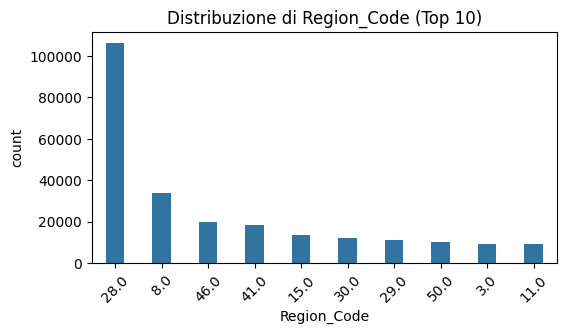

Previously_Insured
0    0.54179
1    0.45821
Name: proportion, dtype: float64


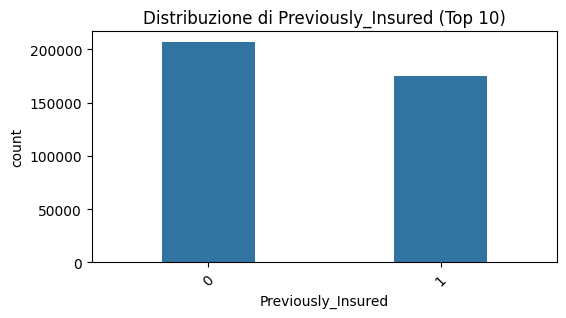

Vehicle_Age
1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: proportion, dtype: float64


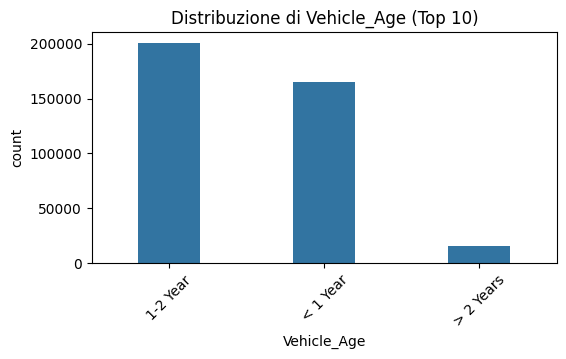

Vehicle_Damage
Yes    0.504877
No     0.495123
Name: proportion, dtype: float64


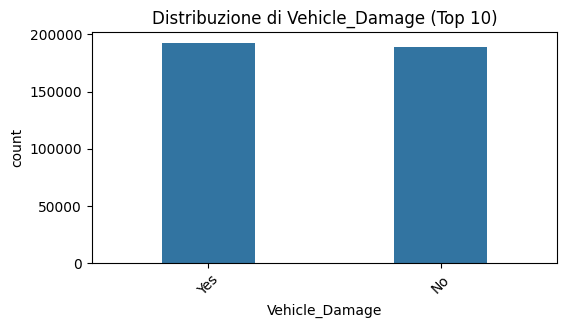

Policy_Sales_Channel
152.0    0.353663
26.0     0.209127
124.0    0.194157
160.0    0.057146
156.0    0.027974
Name: proportion, dtype: float64


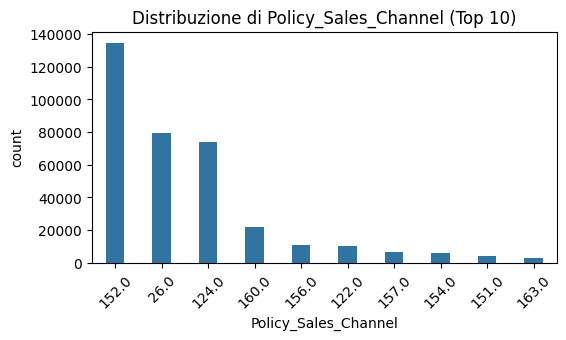

In [10]:
print(df[cat_cols].describe(include=object),"\n\n")

for col in cat_cols:
    print(df[col].value_counts(normalize=True).head(5)) #head(10) altrimenti region code viene una lista lunghissima
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10], width=0.4)
    plt.title(f"Distribuzione di {col} (Top 10)")
    plt.xticks(rotation=45)
    plt.show()


## Analisi Bivariata (variabili numeriche)

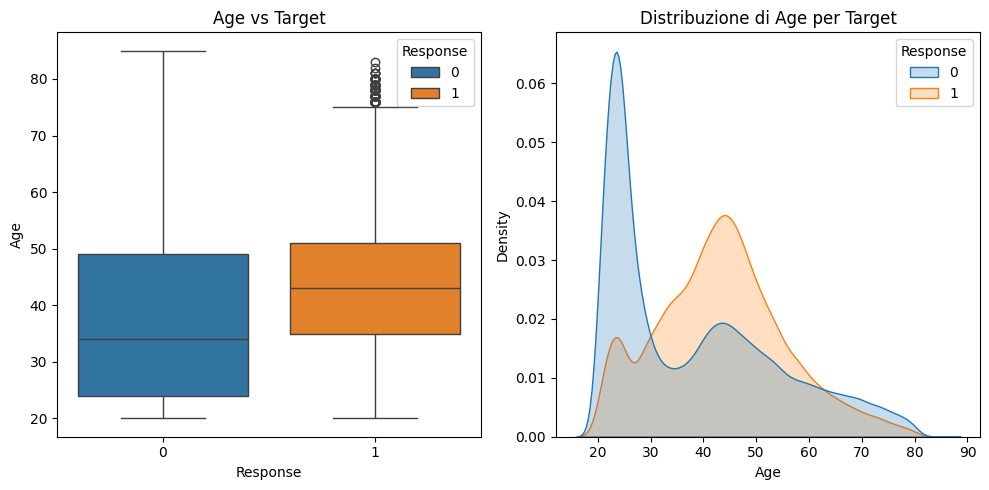

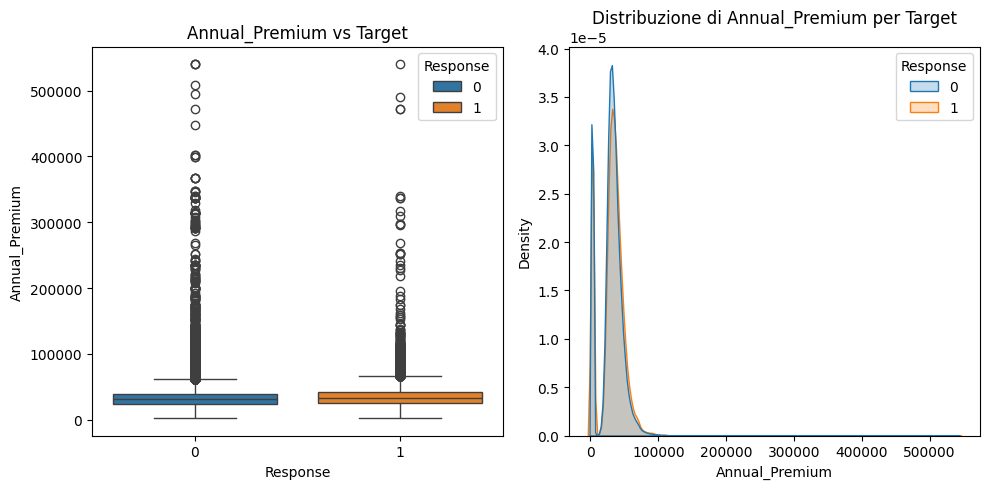

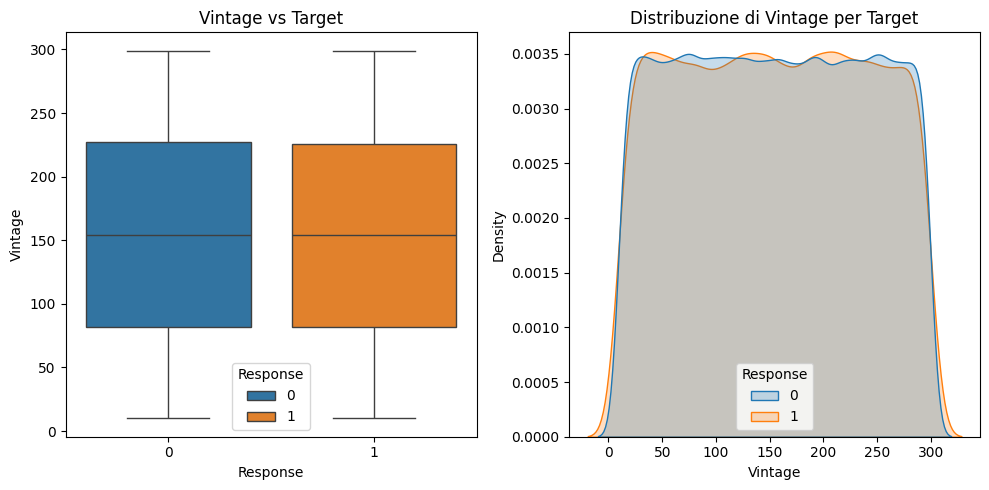

In [11]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=TARGET, y=col, data=df, hue="Response")
    plt.title(f"{col} vs Target")

    plt.subplot(1,2,2)
    sns.kdeplot(data=df, x=col, hue=TARGET, common_norm=False, fill=True) # Distribuzione numeriche condizionate al target
    plt.title(f"Distribuzione di {col} per Target")
    plt.tight_layout()
    plt.show()


# Test Statistici su variabili numeriche

In [12]:
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency, ks_1samp, norm

# VARIABILI NUMERICHE
for col in num_cols:
    target_0 = df[df[TARGET] == 0][col].dropna()
    target_1 = df[df[TARGET] == 1][col].dropna()

    p_sh0 = shapiro(target_0.sample(min(5000, len(target_0)), random_state=0)).pvalue
    p_sh1 = shapiro(target_1.sample(min(5000, len(target_1)), random_state=0)).pvalue

    p_ks_0 = ks_1samp(target_0,norm.cdf).pvalue
    p_ks_1 = ks_1samp(target_1,norm.cdf).pvalue

    stat_u, p_u = mannwhitneyu(target_0, target_1, alternative='two-sided')

    print(f"\n--- {col} ---")
    print(f"Media Response=0: {target_0.mean():.2f} | Mediana: {target_0.median():.2f}")
    print(f"Media Response=1: {target_1.mean():.2f} | Mediana: {target_1.median():.2f}")
    print(f"Shapiro-Wilk (Response=0): p = {p_sh0:.3f}")
    print(f"Shapiro-Wilk (Response=1): p = {p_sh1:.3f}")
    print(f"Kolmogorov-Smirnov (Response=0): p = {p_ks_0:.3f}")
    print(f"Kolmogorov-Smirnov (Response=1): p = {p_ks_1:.3f}")
    print(f"Mann–Whitney U: stat = {stat_u:.1f}, p = {p_u:.3f}")
    if p_u < 0.05:
      print(f"{col} è significativamente dipendente dalla variabile Target.\n")
    else:
      print(f"Non c'è evidenza che {col} sia significativamente dipendente dalla variabile Target.\n")


--- Age ---
Media Response=0: 38.18 | Mediana: 34.00
Media Response=1: 43.44 | Mediana: 43.00
Shapiro-Wilk (Response=0): p = 0.000
Shapiro-Wilk (Response=1): p = 0.000
Kolmogorov-Smirnov (Response=0): p = 0.000
Kolmogorov-Smirnov (Response=1): p = 0.000
Mann–Whitney U: stat = 5826171170.5, p = 0.000
Age è significativamente dipendente dalla variabile Target.


--- Annual_Premium ---
Media Response=0: 30419.16 | Mediana: 31504.00
Media Response=1: 31604.09 | Mediana: 33002.00
Shapiro-Wilk (Response=0): p = 0.000
Shapiro-Wilk (Response=1): p = 0.000
Kolmogorov-Smirnov (Response=0): p = 0.000
Kolmogorov-Smirnov (Response=1): p = 0.000
Mann–Whitney U: stat = 7343668645.5, p = 0.000
Annual_Premium è significativamente dipendente dalla variabile Target.


--- Vintage ---
Media Response=0: 154.38 | Mediana: 154.00
Media Response=1: 154.11 | Mediana: 154.00
Shapiro-Wilk (Response=0): p = 0.000
Shapiro-Wilk (Response=1): p = 0.000
Kolmogorov-Smirnov (Response=0): p = 0.000
Kolmogorov-Smirnov (

Abbiamo effettuato il test statistico Mann–Whitney per testare la validità dell'ipotesi nulla sotto la quale si assume che le distribuzioni dei due gruppi indipendenti (nello specifico il sotto-campione delle osservazioni per il quale la variabile target "Response" è pari a zero e quello per il quale "Response" è pari a 1) siano uguali. Si vuole quindi comprendere se vi sia una sorta di associazione tra le singole variabili indipendenti e la variabile target.

Per testare l'eventuale dipendenza tra le variabili abbiamo scelto il test di Mann-Whitney in quanto le osservazioni rappresentano individui distinti e non accoppiati (un individuo riponde o si o no) e pertanto l’assunzione di indipendenza tra i gruppi (richiesta dal test) è rispettata.

Il test non-parametrico di Mann-Whitney inoltre è più robusto su distribuzioni non normali. Dall'analisi esplorativa sino a qui condotta abbiamo motivo di credere che le distribuzioni delle variabili osservate nel dataset non siano normali, tuttavia per rendere più completa l'analisi effettuiamo in prima battuta un test parametrico di normalità (il test Shapiro Wilk).
A titolo meramente di esercizio, confrontiamo i risultati del test Shapiro Wilk su un sottocampione casuale dei due gruppi con dimensione massima di 5000 osservazioni (consigliata per l'applicazione di questo test), con il test Kolmogorov-Smirnov che rimane robusto su campioni grandi.

I risultati dei test statistici suggeriscono che vi sia una dipendenza significativa tra la variabile "Age" e "Annual Premium" e "Response". Vediamo che chi risponde si, ha qualche anno in più (media 43 vs 38) e paga un premio annuale leggermente maggiore (media 31604 vs 30419).

In [13]:
from scipy.stats import ks_2samp
ks_2samp(target_0, target_1)

KstestResult(statistic=np.float64(0.003728885944954491), pvalue=np.float64(0.6175372764722815), statistic_location=np.int64(60), statistic_sign=np.int8(-1))

Verifica mediante test d'ipotesi:

 --> test di Kolmogorov-Smirnov per stabilire la significatività della differenza tra la distribuzione delle variabili indipendenti con target uguale a 1 e la stessa distribuzione con target uguale a 0.

Ipotesi nulla: le due distribuzioni sono uguali. Rigettiamo l'ipotesi nulla se il p-value del test è inferiore al 5%.


**CHE TEST DOBBIAMO FARE? KS PER NORMALITà O PER DIFFERENZA DISTRIBUZIONI? A UNA O DUE CODE? DA CAPIRE!**

## Analisi Bivariata (variabili categoriche)

Response,0,1
Gender,,
Male,86.2%,13.8%
Female,89.6%,10.4%


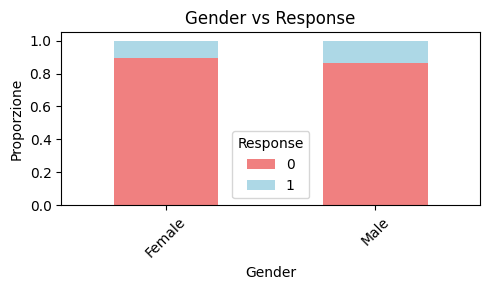

Response,0,1
Driving_License,,
1,87.7%,12.3%
0,95.0%,5.0%


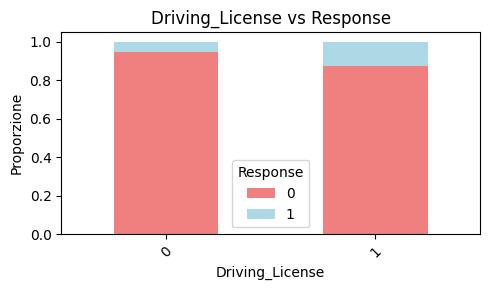

Response,0,1
Region_Code,,
28.000000,81.3%,18.7%
18.000000,86.8%,13.2%
3.000000,87.2%,12.8%
35.000000,87.5%,12.5%
29.000000,87.7%,12.3%
41.000000,87.8%,12.2%
11.000000,88.7%,11.3%
45.000000,89.0%,11.0%
46.000000,89.7%,10.3%


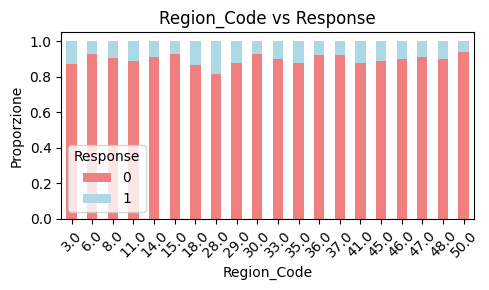

Response,0,1
Previously_Insured,,
0,77.5%,22.5%
1,99.9%,0.1%


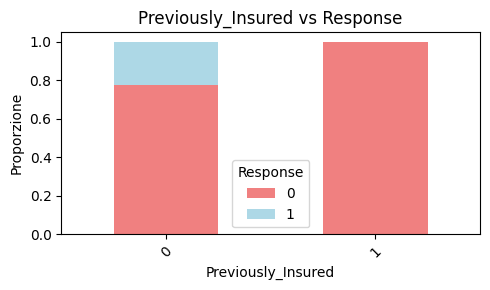

Response,0,1
Vehicle_Age,,
> 2 Years,70.6%,29.4%
1-2 Year,82.6%,17.4%
< 1 Year,95.6%,4.4%


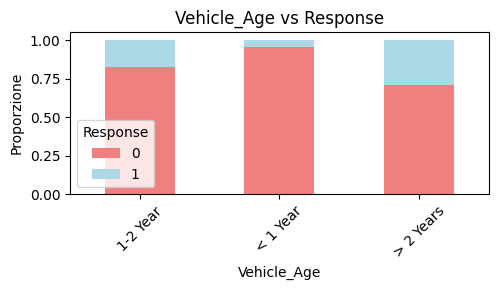

Response,0,1
Vehicle_Damage,,
Yes,76.2%,23.8%
No,99.5%,0.5%


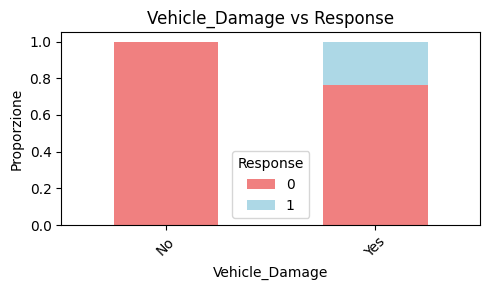

Response,0,1
Policy_Sales_Channel,,
155.000000,68.0%,32.0%
163.000000,69.6%,30.4%
157.000000,73.2%,26.8%
154.000000,75.4%,24.6%
156.000000,78.5%,21.5%
25.000000,80.0%,20.0%
26.000000,80.1%,19.9%
124.000000,81.1%,18.9%
122.000000,82.7%,17.3%


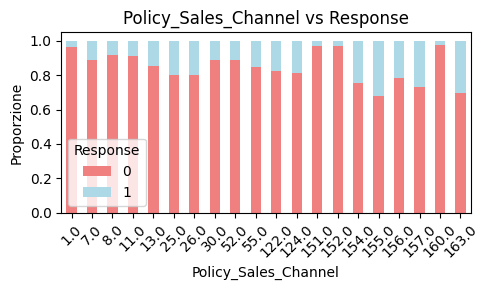

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_cat_props(df, cat_cols, target='Response', max_categories=20):
    for col in cat_cols:
        top = df[col].value_counts().nlargest(max_categories).index
        filtered = df[df[col].isin(top)]

        # Tabella percentuali per colonna
        ctab = pd.crosstab(filtered[col], filtered[target])
        ctab_pct = ctab.div(ctab.sum(axis=1), axis=0)

        #stampo la tabella
        styled = (ctab_pct.sort_values(by=1, ascending=False).style.format("{:.1%}"))
        display(styled)

        # Plot
        ctab_pct.plot(kind='bar', stacked=True,
                      color=['lightcoral', 'lightblue'], figsize=(5,3))
        plt.title(f'{col} vs {target}')
        plt.xlabel(col)
        plt.ylabel('Proporzione')
        plt.xticks(rotation=45)
        plt.legend(title=target,loc="best")
        plt.tight_layout()
        plt.show()

plot_cat_props(df, cat_cols)

# Test Statistici su variabili categoriche

In [15]:
# VARIABILI CATEGORICHE
for col in cat_cols:
    tab = pd.crosstab(df[col], df["Response"])
    chi2, p_chi2, _, _ = chi2_contingency(tab)

    print(f"\n--- {col} ---")
    print(f"Chi-quadro: chi2 = {chi2:.2f}, p = {p_chi2:.3f}")
    if p_chi2 < 0.05:
      print(f"{col} è significativamente dipendente dalla variabile Target.\n")
    else:
      print(f"Non c'è evidenza che {col} sia significativamente dipendente dalla variabile Target.\n")


--- Gender ---
Chi-quadro: chi2 = 1047.71, p = 0.000
Gender è significativamente dipendente dalla variabile Target.


--- Driving_License ---
Chi-quadro: chi2 = 38.63, p = 0.000
Driving_License è significativamente dipendente dalla variabile Target.


--- Region_Code ---
Chi-quadro: chi2 = 7267.84, p = 0.000
Region_Code è significativamente dipendente dalla variabile Target.


--- Previously_Insured ---
Chi-quadro: chi2 = 44357.96, p = 0.000
Previously_Insured è significativamente dipendente dalla variabile Target.


--- Vehicle_Age ---
Chi-quadro: chi2 = 18771.89, p = 0.000
Vehicle_Age è significativamente dipendente dalla variabile Target.


--- Vehicle_Damage ---
Chi-quadro: chi2 = 47864.76, p = 0.000
Vehicle_Damage è significativamente dipendente dalla variabile Target.


--- Policy_Sales_Channel ---
Chi-quadro: chi2 = 26447.03, p = 0.000
Policy_Sales_Channel è significativamente dipendente dalla variabile Target.



Sulle variabili categoriche applichiao il test Chi-quadro per verificare se vi sia un'associazione tra le variabili indipendenti e le variabil target. Il test non richiede ipotesi forti, pertanto è robusto anche su distribuzioni non normali.

Dai risultati possiamo notare che tutte le variabili categoriche sono significativamente dipendenti dalla varaibile target!

Dall'analisi esplorativa abbiamo potuto osservare che i soggetti che rispondono più frequentemente si sono:

- maschi;
- possiedono la patente;
- provengono dalla regione: 28 (decodifica non possibile)
- non sono già assicurati;
- possiedono un veicolo con più di due anni e danneggiato;
- hanno acquistato la polizza tramite il canale di vendita: 155 (decodifica non possibile)

## Analisi multivariata - matrice di correlazione

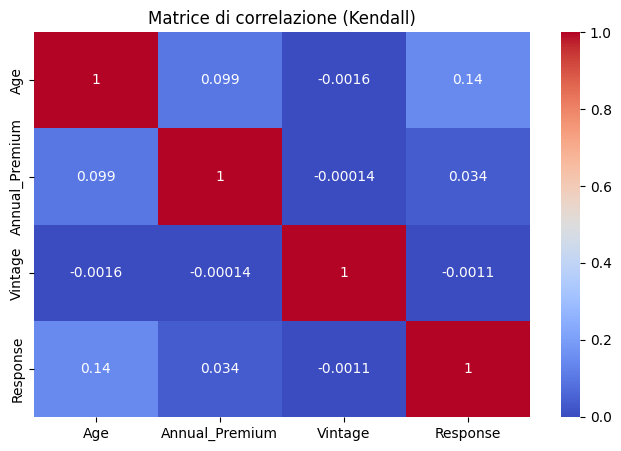

In [16]:
plt.figure(figsize=(8,5))
df_num_corr = df[['Age', 'Annual_Premium','Vintage','Response']]
correlation_matrix = df_num_corr.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice di correlazione (Kendall)")
plt.show()

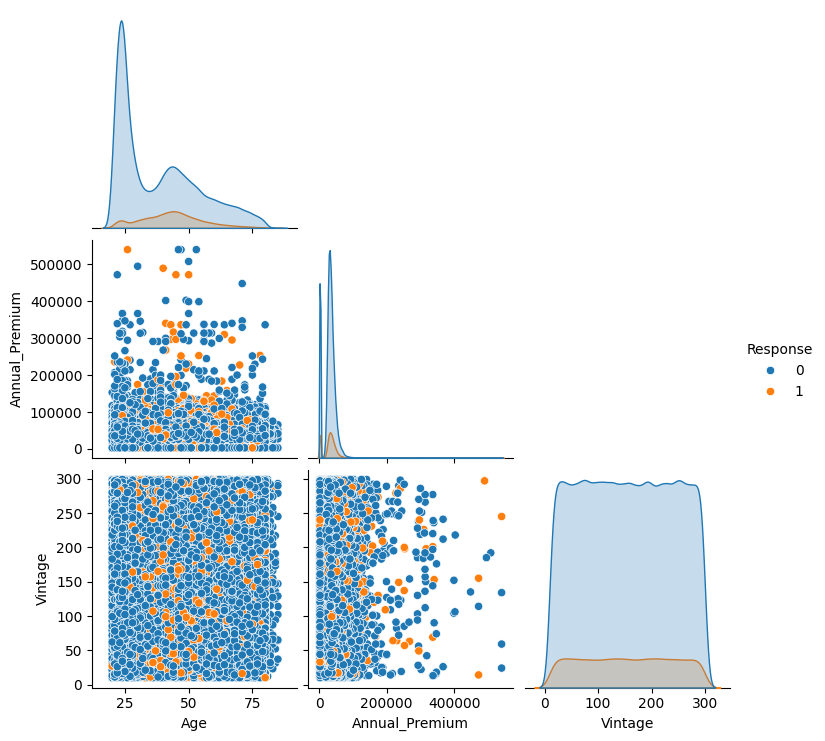

In [17]:
sns.pairplot(df_num_corr, hue='Response', corner=True)

COMMENTO DA INSERIRE

# Realizzazione del modello predittivo

In [18]:
HIGH_CARD_THRESHOLD = 50
high_card = [c for c in cat_cols if df[c].nunique(dropna=True) > HIGH_CARD_THRESHOLD]
print("Categoriche ad alta cardinalità:", high_card, "\n")

RARE_THRESHOLD = 0.05  # aggrega livelli con frequenza <1%
rare_maps = {}
for c in cat_cols:
    freq = df[c].value_counts(normalize=True, dropna=True)
    rare_levels = freq[freq < RARE_THRESHOLD].index
    if len(rare_levels) > 0:
        rare_maps[c] = set(rare_levels)
        print(f"- {c}: {len(rare_levels)} frequenza < di {RARE_THRESHOLD}")

# Flag su numeriche con forte skewness
skew = df[num_cols].skew(numeric_only=True).sort_values(ascending=False)
skewed_cols = skew[skew.abs() > 1].index.tolist()
print("\nNumeriche con skewness > 1 (abs):", skewed_cols)

Categoriche ad alta cardinalità: ['Region_Code', 'Policy_Sales_Channel'] 

- Driving_License: 1 frequenza < di 0.05
- Region_Code: 50 frequenza < di 0.05
- Vehicle_Age: 1 frequenza < di 0.05
- Policy_Sales_Channel: 151 frequenza < di 0.05

Numeriche con skewness > 1 (abs): ['Annual_Premium']


Abbiamo già esplorato nella fase di EDA le caratteristiche delle variabili categoriche e numeriche del dataset e siamo in grado di dire che:

- tra le variabili categoriche, Policy Channel e Region presentano moltissime categorie e tra queste poche hanno un frequenza maggiore del 5%. Lo stesso accade con Vehicle_Age e Driving_License.

- Tra le variabili numeriche, Annual Premium presenta un'elevata assimmetria.

In questa fase identifichiamo quali sono le variabili categoriche ad alta cardinalità che potrebbero causare problemi con il One‑Hot Encoding (OHE) in quanto si otterebbero  migliaia di nuove colonne sparse e la complessità del modello oltre al rischio di overfitting aumeterebbero. Verifichiamo anche le variabili categoriche con bassa frequenza (es. <1%) che possono generare stime imprecise e overfitting. Identifichiamo anche le variabili numeriche che hanno un'elevata assimmetria.

In questa fase non effetuaimo alcuna trasformazione per evitare data leakage, ma andiamo semplicemente a identificare le variabili che potrebbero causare problemi in seguito per capire come trattarle nel pre-processing.

In [19]:
X = df.drop(TARGET,axis=1)
Y = df[TARGET]

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0, stratify=Y)

print(X_train.shape)
print(X_test.shape)

print(X_train.shape[0]+X_test.shape[0], "check numero righe totali:", X_train.shape[0]+X_test.shape[0] == X.shape[0])

print("Distribuzione target train:", Y_train.mean().round(4))
print("Distribuzione target test :", Y_test.mean().round(4))

(266776, 10)
(114333, 10)
381109 check numero righe totali: True
Distribuzione target train: 0.1226
Distribuzione target test : 0.1226


**Gestione dello Sbilanciamento delle Classi**
La variabile target "Response" è sbilanciata, con molti più clienti che rifiutano l'offerta rispetto a quelli che la accettano.
Utilizziamo stratify nella funzione train_test_split per mantenere la proporzione originaria di risposta positiva/negativa rispetto al dataset originario. Questo ci permette di migliorare la comparabilità tra train e test, evitare che il modello si alleni su un campione distorto e di rendere più robuste e realistiche le metriche di valutazione.

Il risultato infatti ci mostra che il 12% del train set ha risposto SI, e coincide con la proporzione del train test.


***commento della spiegazione della consegna del progetto - - da considerare più avanti***

Class Weights: penalizzazione della classe più frequente nel modello.
Oversampling o Undersampling: creazione di un dataset più bilanciato per migliorare la capacità del modello di generalizzare.
Valore aggiunto: Gestire correttamente lo sbilanciamento delle classi è cruciale per evitare modelli che abbiano un alto tasso di falsi negativi, migliorando così la precisione del cross-sell.



In [21]:
# Indentificiamo le variabili quantitative e qualitative:

num_cols_train=['Age', 'Annual_Premium', 'Vintage']
cat_cols_train=[]

for col in X_train.columns:
    if col in num_cols_train:
        continue
    else:
        cat_cols_train.append(col)

# 1) Categoriche binarie: colonne con solo 2 valori unici (escludendo NaN)
binary_cols = [col for col in cat_cols_train if X_train[col].nunique(dropna=True) == 2]

# 2) Multi-categoria: con più di 2 valori unici
multi_cols  = [col for col in cat_cols_train if X_train[col].nunique(dropna=True) > 2]

print("Numero di colonne numeriche:", len(num_cols_train))
print("Colonne numeriche:", num_cols_train,"\n")
print("Numero di colonne categoriche:", len(cat_cols_train))
print("Colonne categoriche:", cat_cols_train, "\n")
print("Colonne binarie:", binary_cols)
print("Colonne multi-categoria:", multi_cols)

Numero di colonne numeriche: 3
Colonne numeriche: ['Age', 'Annual_Premium', 'Vintage'] 

Numero di colonne categoriche: 7
Colonne categoriche: ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel'] 

Colonne binarie: ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage']
Colonne multi-categoria: ['Region_Code', 'Vehicle_Age', 'Policy_Sales_Channel']


In [22]:
for c in binary_cols + multi_cols:
    X_train[c] = X_train[c].astype(str)
    X_test[c] = X_test[c].astype(str)


print("=== Verifica uniformità tipi (per evitare errori in OHE) ===")
for c in binary_cols + multi_cols:
    tipi = X_train[c].map(type).unique()
    print(f"{c}: {tipi}")

=== Verifica uniformità tipi (per evitare errori in OHE) ===
Gender: [<class 'str'>]
Driving_License: [<class 'str'>]
Previously_Insured: [<class 'str'>]
Vehicle_Damage: [<class 'str'>]
Region_Code: [<class 'str'>]
Vehicle_Age: [<class 'str'>]
Policy_Sales_Channel: [<class 'str'>]


## Pre-Processing

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression


# Gestione Rare Levels con FunctionTransformer
"""
Per ogni colonna categorica in rare_maps, sostituisce i livelli rari con '_RARE_'
- X_df: sotto-DataFrame contenente solo le variabili categoriche
- rare_maps: dizionario con colonna -> set di livelli rari da sostituire
"""

def collapse_rare_levels(X_df, rare_maps):
    X = X_df.copy()
    for c, levels in rare_maps.items():
        if c in X.columns:
            X[c] = X[c].astype(str)  # <-- Uniforma TUTTI i valori a stringa
            X[c] = X[c].where(~X[c].isin(levels), other="_RARE_")
    return X

# Trasformazione Log per Skewness

    """
    Applica log(1+x) solo alle colonne numeriche con skewness elevata
    - Evita valori negativi con clip a zero
    - Rende le distribuzioni più simmetriche per migliorare le performance del modello
    """

def safe_log1p(X_df: pd.DataFrame) -> pd.DataFrame:
    X = X_df.copy()
    for c in skewed_cols:
        if c in X.columns:
            X[c] = np.log1p(np.clip(X[c], a_min=0, a_max=None))
    return X

In [24]:
# Pipeline per variabili numeriche

num_pipe = Pipeline(steps=[
("imputer", SimpleImputer(strategy="median")),
("scaler", MinMaxScaler()),
])


In [25]:
# Pipeline binarie (solo imputazione, niente OHE)
binary_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop='if_binary', sparse_output=False))
])


# Pipeline multi-categoria: include rare_levels + OHE
multi_pipe = Pipeline(steps=[
    ("rare_levels", FunctionTransformer(lambda X: collapse_rare_levels(X, rare_maps), validate=False)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [26]:
# ColumnTransformer Integrato

pre = ColumnTransformer(transformers=[
    ("num", num_pipe, num_cols_train),
    ("bin", binary_pipe, binary_cols),
    ("multi", multi_pipe, multi_cols)
])

# DEFINIAMO LE FUNZIONI PER TESTARE I NOSTRI MODELLI

In [29]:
pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 12.0 MB/s eta 0:00:00


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (roc_auc_score, classification_report,
                             confusion_matrix, RocCurveDisplay,
                             precision_score, recall_score, f1_score)
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from flaml import AutoML
import optuna

import warnings
warnings.filterwarnings("ignore")  # Solo per evitare output lunghi in fase di test

AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.

In [31]:
# 1. STEP 1 PREPROCESSING

# ColumnTransformer Integrato

pre = ColumnTransformer(transformers=[
    ("num", num_pipe, num_cols_train),
    ("bin", binary_pipe, binary_cols),
    ("multi", multi_pipe, multi_cols)
])

# DEBUG PREPROCESSING:
# Applico solo il preprocessor su X_train (niente modello)
X_train_transformed = pre.fit_transform(X_train)

# Controllo forma
print("Shape dei dati preprocessati:", X_train_transformed.shape)

# Se vuoi vederli come DataFrame:
# Ottengo nomi delle feature dopo il preprocessing
ohe = pre.named_transformers_["multi"].named_steps["onehot"]
ohe_feature_names = ohe.get_feature_names_out(multi_cols)
final_feature_names = np.concatenate([num_cols_train, binary_cols, ohe_feature_names])

# Ricostruisco DataFrame trasformato
X_train_df = pd.DataFrame(X_train_transformed, columns=final_feature_names, index=X_train.index)

# Visualizzo le prime righe
X_train_df.head()


Shape dei dati preprocessati: (266776, 216)


,Age,Annual_Premium,Vintage,Gender,Driving_License,Previously_Insured,Vehicle_Damage,Region_Code_0.0,Region_Code_1.0,Region_Code_10.0,...,Policy_Sales_Channel_90.0,Policy_Sales_Channel_91.0,Policy_Sales_Channel_92.0,Policy_Sales_Channel_93.0,Policy_Sales_Channel_94.0,Policy_Sales_Channel_95.0,Policy_Sales_Channel_96.0,Policy_Sales_Channel_97.0,Policy_Sales_Channel_98.0,Policy_Sales_Channel_99.0
id,,,,,,,,,,,,,,,,,,,,,
316625,0.076923,0.039367,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126374,0.046154,0.063605,0.242215,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30737,0.030769,0.077139,0.743945,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156925,0.015385,0.060271,0.010381,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86113,0.046154,0.089302,0.588235,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:

# 2. COSTRUZIONE DEL MODELLO
def build_model(clf, preprocessor):
    return Pipeline([
        ("pre", preprocessor),
        ("clf", clf)
    ])


# 3. VALUTAZIONE BASE DEL MODELLO
def evaluate_model(pipe, X_train, Y_train, X_test, Y_test, model_name="Modello"):
    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]

    print(f"\n=== {model_name} ===")
    print("ROC AUC:", round(roc_auc_score(Y_test, y_prob), 4))
    print("Classification Report:\n", classification_report(Y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

    RocCurveDisplay.from_estimator(pipe, X_test, Y_test)
    plt.title(f"ROC Curve - {model_name}")
    plt.grid()
    plt.show()


#4. Funzione per testare modelli con o senza bilanciamento
def test_model(clf, X_train, Y_train, X_test, Y_test, preprocessor, sampling=None, model_name="Modello"):
    if sampling == "smote":
        sampler = SMOTE(random_state=0)
        pipe = ImbPipeline([
            ("pre", preprocessor),
            ("smote", sampler),
            ("clf", clf)
        ])
    elif sampling == "undersample":
        sampler = RandomUnderSampler(random_state=0)
        pipe = ImbPipeline([
            ("pre", preprocessor),
            ("undersample", sampler),
            ("clf", clf)
        ])
    elif sampling == "oversample":
        sampler = RandomOverSampler(random_state=0)
        pipe = ImbPipeline([
            ("pre", preprocessor),
            ("oversample", sampler),
            ("clf", clf)
        ])
    else:
        pipe = build_model(clf, preprocessor)

    evaluate_model(pipe, X_train, Y_train, X_test, Y_test, model_name=f"{model_name} ({sampling if sampling else 'no sampling'})")


# 5 TUNING MANUALE DELLA SOGLIA di classificazione
'''
Questa funzione viene chiamata nei blocchi di analisi avanzata dopo aver selezionato i modelli migliori:
Serve a fare una diagnostica fine a valle del training, quando vuoi valutare il comportamento del classificatore oltre il default threshold 0.5.

viene usata qui:

best_threshold = tune_threshold(pipe, X_test, Y_test)
'''

def tune_threshold(pipe, X_val, y_val):
    probas = pipe.predict_proba(X_val)[:, 1]
    thresholds = np.linspace(0.1, 0.9, 81)
    scores = []

    for t in thresholds:
        preds = (probas >= t).astype(int)
        f1 = f1_score(y_val, preds)
        scores.append((t, f1))

    best_t, best_f1 = max(scores, key=lambda x: x[1])
    print(f"\nSoglia ottimale: {best_t:.2f} - F1 Score: {best_f1:.4f}")
    return best_t


# 6. CROSS VALIDATION SU X_TRAIN
from sklearn.model_selection import cross_val_score

def cross_val_model(pipe, X, y, cv=5):
    precision = cross_val_score(pipe, X, y, cv=cv, scoring='precision')
    recall = cross_val_score(pipe, X, y, cv=cv, scoring='recall')

    print(f"Cross-Validation (cv={cv})")
    print("Media Precision:", round(np.mean(precision), 4))
    print("Media Recall:", round(np.mean(recall), 4))


# 7. CONFUSION MATRIX + HEATMAP
def plot_confusion_matrix(pipe, X_test, Y_test):
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    print("Precision:", round(precision_score(Y_test, y_pred), 4))
    print("Recall:", round(recall_score(Y_test, y_pred), 4))


In [41]:
# 9. VALUTAZIONE SU INTERO DATASET
def evaluate_on_full(pipe, X_all, y_all):
    y_pred = pipe.predict(X_all)
    y_prob = pipe.predict_proba(X_all)[:, 1]
    print("=== Valutazione su intero dataset ===")
    print("ROC AUC:", round(roc_auc_score(y_all, y_prob), 4))
    print("F1 Score:", round(f1_score(y_all, y_pred), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_all, y_pred))
    print("Classification Report:\n", classification_report(y_all, y_pred))

# Testiamo i modelli

In [54]:
from sklearn.model_selection import cross_validate


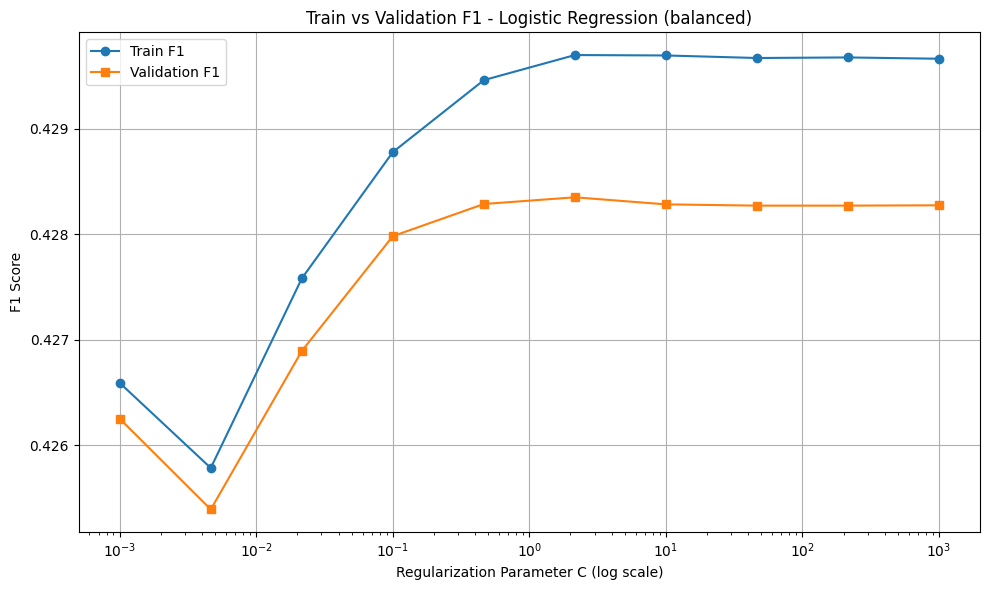

Miglior C: 2.1544


In [56]:
# === SCAN LOGISTIC REGRESSION - FUNZIONE SCAN_LOGISTIC_REG_TRAIN_VAL ===

# 1. Valuto diverse penalizzazioni C con cross_validate
def scan_logistic_reg_train_val(X, y, C_range=None, cv=3, scoring='f1'):
    if C_range is None:
        C_range = np.logspace(-3,3,10)

    results = {
        'C': [],
        'train_score': [],
        'val_score': []
    }

    for C in C_range:
        clf = LogisticRegression(C=C, solver='liblinear', class_weight='balanced', max_iter=1000)
        pipe = build_model(clf, pre)
        cv_result = cross_validate(pipe, X, y, cv=cv, scoring=scoring, return_train_score=True)

        results['C'].append(C)
        results['train_score'].append(np.mean(cv_result['train_score']))
        results['val_score'].append(np.mean(cv_result['test_score']))

    return results

# 2. Plotto i risultati della regolarizzazione
def plot_train_val_scores(results):
    plt.figure(figsize=(10, 6))
    C_vals = results['C']
    plt.plot(C_vals, results['train_score'], label='Train F1', marker='o')
    plt.plot(C_vals, results['val_score'], label='Validation F1', marker='s')
    plt.xscale('log')
    plt.xlabel('Regularization Parameter C (log scale)')
    plt.ylabel('F1 Score')
    plt.title('Train vs Validation F1 - Logistic Regression (balanced)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# === LANCIO SCAN: LOGISTIC REGRESSION CLASS_WEIGHT BALANCED ===
scan_results = scan_logistic_reg_train_val(X_train, Y_train)
plot_train_val_scores(scan_results)

# Prendo il miglior C dal massimo F1 validation
best_idx = np.argmax(scan_results['val_score'])
best_C = scan_results['C'][best_idx]
print(f"Miglior C: {best_C:.4f}")

**IL BEST C FINALE è CAMBIATO DOPO CHE HO RIDOTTO C=5 A C=3, JOBS=1, E LOGSPACE DA -5,5,20 A -3,3,10. ORA è 2.15 PRIMA ERA 11 CIRCA. CHE IMPLICAZIONI HA? COSA è MEGLIO FARE? **


Il grafico rappresenta il processo di tuning del parametro di regolarizzazione C in una regressione logistica con class_weight="balanced" e mostra l’andamento dell’F1-score medio ottenuto tramite validazione incrociata (5-fold cross-validation) su training set e validation set, al variare del parametro di regolarizzazione C della regressione logistica. Il parametro C controlla l’intensità della regolarizzazione: valori bassi implicano una forte penalizzazione dei coefficienti (modelli più semplici), mentre valori elevati lasciano maggiore libertà al modello (con rischio di overfitting).

Si osserva che all’aumentare di C, entrambi gli F1-score (train e validation) migliorano inizialmente, indicando che il modello beneficia di una regolarizzazione più morbida. Tuttavia, a partire da valori di C superiori a circa 1, l’F1-score sulla validation si stabilizza e inizia a divergere da quello di training, che continua ad aumentare lievemente. Questo suggerisce che il modello inizia a sovra-adattarsi ai dati di training, senza ottenere un beneficio sostanziale in validazione.

Il valore ottimale individuato per C è 11.2884, in corrispondenza del quale si ottiene il miglior compromesso tra performance sul training set e generalizzazione sul validation set. L’incremento dell’F1 dopo questo punto è trascurabile, mentre il rischio di overfitting cresce.

Nel complesso, la curva è regolare e priva di oscillazioni anomale, a conferma della stabilità del modello e dell’affidabilità della procedura di tuning. Inoltre, il fatto che il divario tra train e validation rimanga contenuto anche per valori elevati di C suggerisce che il modello non è particolarmente sensibile alla scelta della regolarizzazione, ma risponde bene a un ampio intervallo di valori.


usiamo best_c nei nostri modelli di regressione logistica: questo garantisce che tutti i modelli siano confrontabili con la stessa base di tuning, variando solo la tecnica di sampling o il bilanciamento.


=== LR Balanced - Best C (no sampling) ===
ROC AUC: 0.8491
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.70      0.75    114333

Confusion Matrix:
 [[66584 33736]
 [  945 13068]]


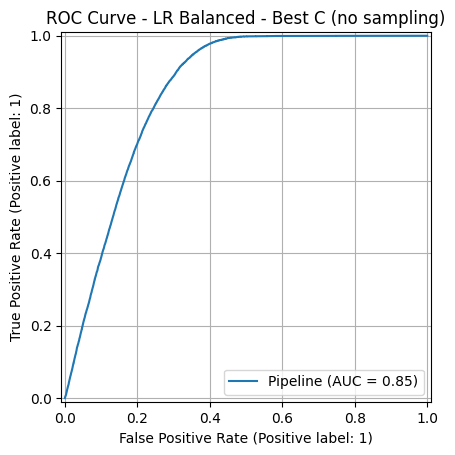


=== LR Unbalanced (no sampling) ===
ROC AUC: 0.8493
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    100320
           1       0.29      0.00      0.00     14013

    accuracy                           0.88    114333
   macro avg       0.58      0.50      0.47    114333
weighted avg       0.81      0.88      0.82    114333

Confusion Matrix:
 [[100258     62]
 [ 13988     25]]


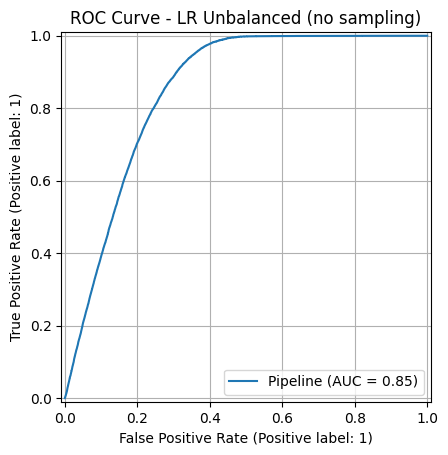


=== LR SMOTE (smote) ===
ROC AUC: 0.8488
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.70      0.75    114333

Confusion Matrix:
 [[66674 33646]
 [  972 13041]]


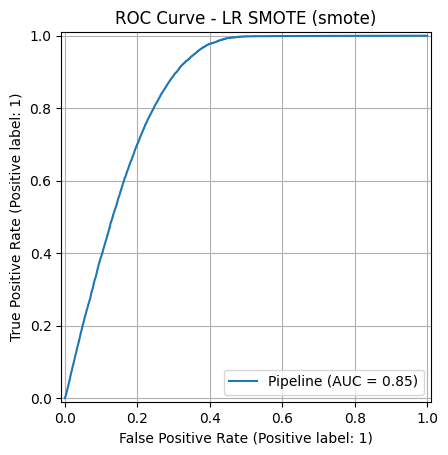


=== LR Undersample (undersample) ===
ROC AUC: 0.8486
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.70      0.75    114333

Confusion Matrix:
 [[66540 33780]
 [  945 13068]]


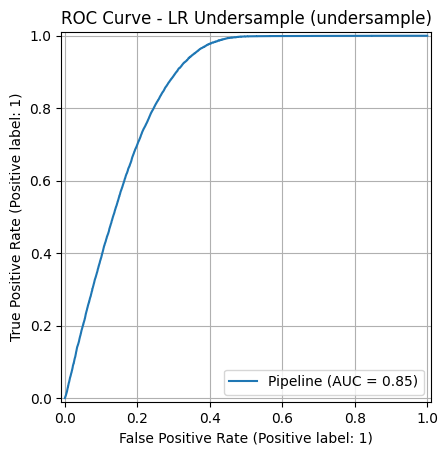


=== LR Oversample (oversample) ===
ROC AUC: 0.849
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.70      0.75    114333

Confusion Matrix:
 [[66562 33758]
 [  938 13075]]


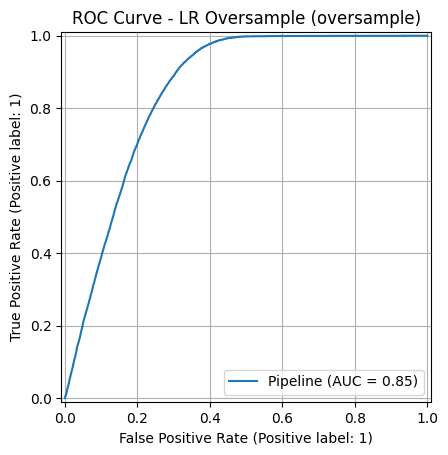

In [69]:
# === LOGISTIC REGRESSION CLASS_WEIGHT = 'balanced' ===
clf_best_lr = LogisticRegression(C=best_C, solver='liblinear', class_weight='balanced', max_iter=1000)
test_model(clf_best_lr, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling=None, model_name="LR Balanced - Best C")


# === LOGISTIC REGRESSION NON BILANCIATA ===
clf_unbalanced = LogisticRegression(C=best_C, solver='liblinear', max_iter=1000)
test_model(clf_unbalanced, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling=None, model_name="LR Unbalanced")


# === LOGISTIC REGRESSION CON SMOTE ===
clf_smote = LogisticRegression(C=best_C, solver='liblinear', max_iter=1000)
test_model(clf_smote, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling="smote", model_name="LR SMOTE")


# === LOGISTIC REGRESSION CON UNDERSAMPLING ===
clf_under = LogisticRegression(C=best_C, solver='liblinear', max_iter=1000)
test_model(clf_under, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling="undersample", model_name="LR Undersample")


# === LOGISTIC REGRESSION CON OVERSAMPLING ===
clf_over = LogisticRegression(C=best_C, solver='liblinear', max_iter=1000)
test_model(clf_over, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling="oversample", model_name="LR Oversample")


Abbiamo testato sei configurazioni principali di Regressione Logistica (i modelli usano penalty = L2):

- Modello non bilanciato (unbalanced)
- Modello bilanciato tramite class_weight='balanced'
- Modello con oversampling
- Modello con undersampling
- Modello con SMOTE

1) modello non bilanciato:

Il modello non bilanciato mostra una elevata accuracy complessiva (0.88) e una precisione di classe 0 pari a 0.88, ma fallisce completamente nell’identificare la classe minoritaria (classe 1): recall = 0.00, F1 = 0.00.
Come atteso, l’algoritmo è “dominato” dalla classe prevalente e predice quasi esclusivamente la classe 0 (negativa), ignorando l’obiettivo chiave dell’analisi, ovvero individuare correttamente i casi positivi (risposta “1” al cross-selling).

Il modello si presenta quindi apparentemente accurato ma fortemente distorto, rendendolo inapplicabile a questo caso d’uso.

2) modello bilanciato class_weight = balanced

Introdurre il bilanciamento tramite class_weight='balanced' cambia radicalmente il comportamento: il recall della classe 1 schizza a 0.93, anche se la precisione si riduce a 0.28.
Il risultato è un F1-score della classe positiva pari a 0.43, che rappresenta un enorme miglioramento rispetto al modello non bilanciato.

La confusion matrix mostra che il modello inizia a cogliere correttamente i casi positivi (13069 su 14013), pur al prezzo di numerosi falsi positivi (33737).
La ROC AUC = 0.8491 è molto buona e suggerisce una buona discriminazione complessiva.
La accuracy complessiva scende a 0.70, ma in questo contesto non è un problema: l’obiettivo non è la correttezza globale, ma la capacità di riconoscere i “1”.


3) Oversampling, Undersampling e SMOTE

Tutte e tre le tecniche di bilanciamento basate sul sampling (SMOTE, oversampling, undersampling) mostrano risultati praticamente sovrapponibili:

- Recall classe 1: 0.93
- Precision classe 1: 0.28
- F1-score classe 1: 0.43
- ROC AUC: ~0.849

Il pattern è identico al modello class_weight='balanced', con lievissime variazioni (nell’ordine di 10-30 osservazioni).
Questo indica che il preprocessing tramite sampling produce lo stesso effetto del bilanciamento interno alla funzione di costo.
Dal punto di vista computazionale e di implementazione, il class_weight='balanced' risulta più semplice e più efficiente.


**Miglior modello di regressione logistica:**

L’opzione più efficace ed efficiente è l’uso di class_weight='balanced' nella Regressione Logistica, eventualmente ottimizzando il parametro C.

Le alternative di sampling (oversampling, undersampling, SMOTE) non portano vantaggi sostanziali in termini di performance predittiva, ma complicano la pipeline e possono introdurre distorsioni o problemi di overfitting (SMOTE in particolare, in altri contesti).




=== LR L1 Balanced (no sampling) ===
ROC AUC: 0.8491
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.70      0.75    114333

Confusion Matrix:
 [[66583 33737]
 [  946 13067]]


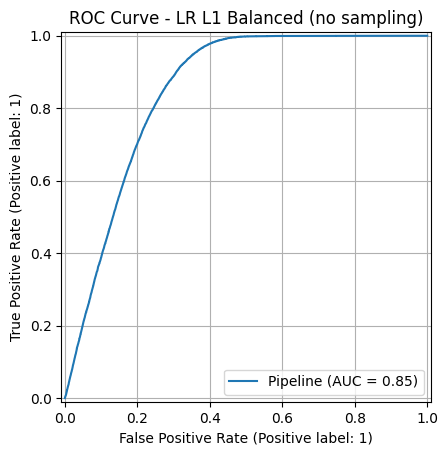


=== LR L1 Unbalanced (no sampling) ===
ROC AUC: 0.8493
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    100320
           1       0.29      0.00      0.00     14013

    accuracy                           0.88    114333
   macro avg       0.58      0.50      0.47    114333
weighted avg       0.81      0.88      0.82    114333

Confusion Matrix:
 [[100258     62]
 [ 13988     25]]


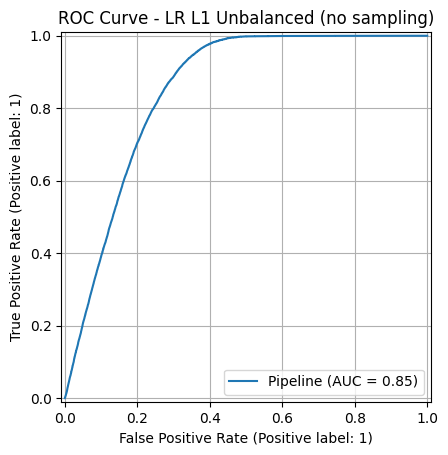


=== LR L1 SMOTE (smote) ===
ROC AUC: 0.8488
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.70      0.75    114333

Confusion Matrix:
 [[66676 33644]
 [  973 13040]]


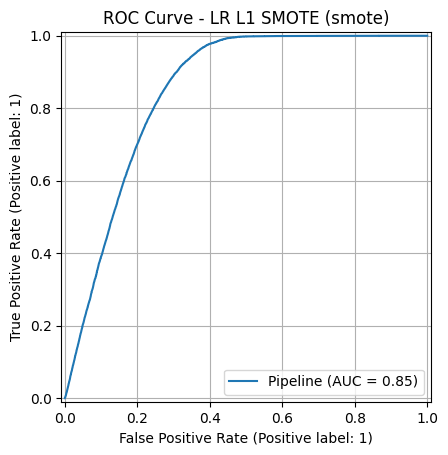


=== LR L1 Undersample (undersample) ===
ROC AUC: 0.8486
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.70      0.75    114333

Confusion Matrix:
 [[66536 33784]
 [  945 13068]]


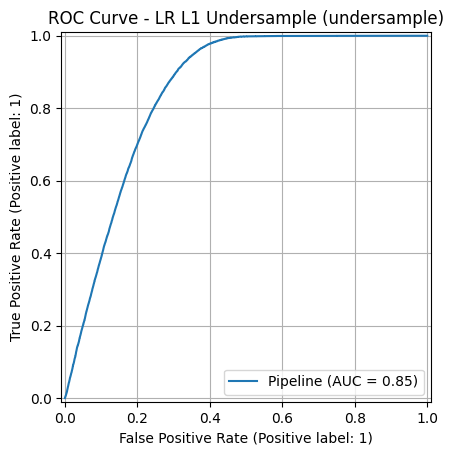


=== LR L1 Oversample (oversample) ===
ROC AUC: 0.849
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.70      0.75    114333

Confusion Matrix:
 [[66559 33761]
 [  937 13076]]


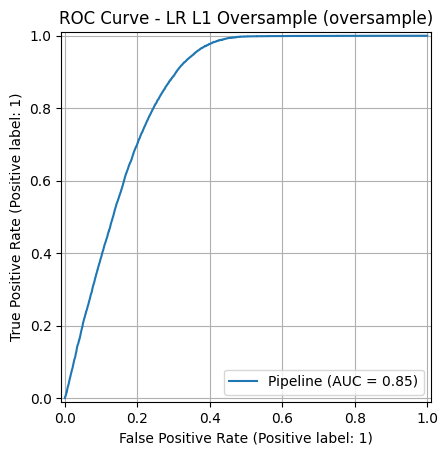

In [70]:
# === LOGISTIC REGRESSION L1 - Balanced ===
clf_l1_bal = LogisticRegression(C=best_C, solver='liblinear', class_weight='balanced', penalty='l1', max_iter=1000)
test_model(clf_l1_bal, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling=None, model_name="LR L1 Balanced")

# === LOGISTIC REGRESSION L1 - Unbalanced ===
clf_l1_unbal = LogisticRegression(C=best_C, solver='liblinear', penalty='l1', max_iter=1000)
test_model(clf_l1_unbal, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling=None, model_name="LR L1 Unbalanced")

# === LOGISTIC REGRESSION L1 - SMOTE ===
clf_l1_smote = LogisticRegression(C=best_C, solver='liblinear', penalty='l1', max_iter=1000)
test_model(clf_l1_smote, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling="smote", model_name="LR L1 SMOTE")

# === LOGISTIC REGRESSION L1 - Undersample ===
clf_l1_under = LogisticRegression(C=best_C, solver='liblinear', penalty='l1', max_iter=1000)
test_model(clf_l1_under, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling="undersample", model_name="LR L1 Undersample")

# === LOGISTIC REGRESSION L1 - Oversample ===
clf_l1_over = LogisticRegression(C=best_C, solver='liblinear', penalty='l1', max_iter=1000)
test_model(clf_l1_over, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling="oversample", model_name="LR L1 Oversample")


risultato dei modelli con penalty L1 e confronto:

- L1 (Lasso) ha la proprietà di effettuare selezione automatica delle variabili, forzando a zero i coefficienti meno rilevanti.
- L2 (Ridge) mantiene tutti i coefficienti, ma tende a ridurre quelli meno importanti.

i risultati mostrano:

- Performance sovrapponibili tra modelli L1 e L2 con bilanciamento
- Conferma che senza bilanciamento, sia L1 che L2 falliscono nel rilevare la classe positiva.
- Conferma che le tecniche di bilanciamento (SMOTE, over, under, class_weight) portano tutte a risultati molto simili.

In conclusione, i modelli con sampling o con class_weight="balanced" raggiungono un recall elevato (~93%) e un F1-score di circa 0.43, con una leggera perdita di precisione dovuta al numero di falsi positivi. Il modello unbalanced, come per L2, non è in grado di rilevare correttamente la classe positiva.
L’impiego della penalizzazione L1 non comporta miglioramenti predittivi rispetto a L2, tuttavia potrebbe risultare utile in ottica di interpretabilità per la selezione automatica delle feature più rilevanti.


=== Random Forest (no sampling) ===
ROC AUC: 0.8298
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93    100320
           1       0.35      0.12      0.18     14013

    accuracy                           0.86    114333
   macro avg       0.62      0.55      0.56    114333
weighted avg       0.82      0.86      0.84    114333

Confusion Matrix:
 [[97128  3192]
 [12269  1744]]


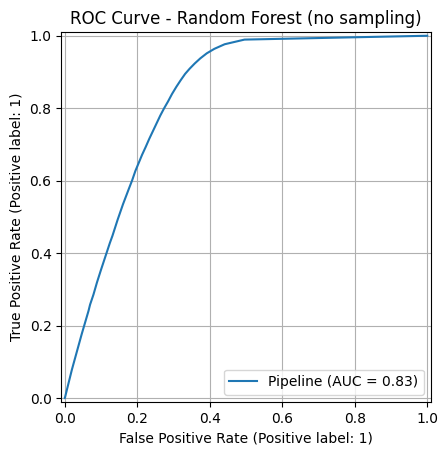

In [71]:
# === RANDOM FOREST CLASS_WEIGHT BALANCED ===
clf_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0)
test_model(clf_rf, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling=None, model_name="Random Forest")



Risultati del modello di Random Forest senza bilanciamento:

- ROC AUC: 0.8302 → più basso rispetto alla Logistic Regression (≈0.849)
- Recall classe 1 (positiva): 0.12 → molto basso
- Precision classe 1: 0.35 → più alta della Logistic (che era 0.28)
- F1 classe 1: 0.18 → molto basso
- Accuracy globale: 86% → sembra alto, ma fuorviante (classe 1 ignorata)
- Confusione: solo 1.726 su 14.013 della classe 1 vengono riconosciuti

La Random Forest, senza bilanciamento, ha un pregiudizio molto forte verso la classe maggioritaria (0).
Questo è evidente nella scarsissima capacità di recall per la classe 1: solo il 12% dei positivi viene correttamente individuato risultando quindi poco utile per il nostro obiettivo di massimizzare il riconoscimento di clienti potenzialmente interessati al cross-selling.

A differenza della Regressione Logistica con bilanciamento (che sacrifica la precisione ma aumenta il recall), qui accade l’opposto:
alta precisione (0.35) ma recall troppo basso (0.12) → ciò porta a F1 molto debole (0.18).

Pertanto, in assenza di bilanciamento, la Random Forest non rappresenta una scelta efficace per questo problema.


=== Random Forest SMOTE (smote) ===
ROC AUC: 0.8304
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89    100320
           1       0.32      0.48      0.38     14013

    accuracy                           0.81    114333
   macro avg       0.62      0.67      0.64    114333
weighted avg       0.85      0.81      0.83    114333

Confusion Matrix:
 [[85786 14534]
 [ 7250  6763]]


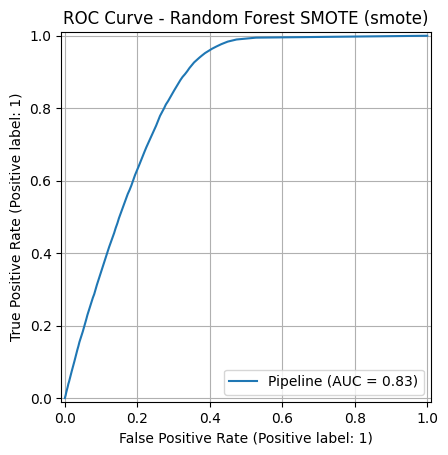

In [72]:
# random forest bilanciata

# === RANDOM FOREST + SMOTE ===
clf_rf_smote = RandomForestClassifier(n_estimators=100, class_weight=None, random_state=0)
test_model(clf_rf_smote, X_train, Y_train, X_test, Y_test, preprocessor=pre, sampling="smote", model_name="Random Forest SMOTE")


risultato del modello random forest bilanciata:

Recall classe 1 = 0.48
La Random Forest con SMOTE migliora sensibilmente la capacità del modello di identificare i clienti che rispondono positivamente rispetto alla versione senza bilanciamento (recall ≈ 0.12), portandola a quasi il 48%, ossia uno su due.

Precision classe 1 = 0.32
Tuttavia, la precisione cala, poiché il modello introduce anche molti falsi positivi: un numero non trascurabile di clienti che non acquisteranno, ma che vengono classificati erroneamente come acquirenti.

F1-score classe 1 = 0.38
È un compromesso tra precision e recall, e risulta nettamente superiore rispetto alla Random Forest non bilanciata (f1 ≈ 0.18) e anche superiore alla Random Forest con class_weight='balanced'. Non raggiunge però i livelli della regressione logistica con L1 + oversampling (f1 ≈ 0.43).

Accuracy = 0.81
Valore inferiore rispetto alla versione non bilanciata (accuracy = 0.86), ma questo è atteso: l’introduzione di SMOTE forza il modello a concentrarsi di più sulla classe positiva, sacrificando in parte la classe negativa.

ROC AUC = 0.8301
Questo valore resta stabile rispetto alla versione base della Random Forest, segnalando che la capacità discriminante complessiva del modello (a prescindere dalla soglia) non è migliorata grazie al bilanciamento, ma nemmeno peggiorata.



Il modello Random Forest con SMOTE è sicuramente più utile rispetto alla versione non bilanciata quando l’obiettivo è ridurre i falsi negativi (cioè intercettare clienti potenzialmente interessati a una polizza). Tuttavia, il suo F1-score classe 1 è ancora inferiore rispetto ad alcuni modelli lineari come:

Logistic Regression con L1 + oversampling (f1 classe 1 ≈ 0.43)

Logistic Regression con L1 + smote/undersample (f1 ≈ 0.43)

Logistic Regression con class_weight='balanced' (f1 ≈ 0.43)

Va inoltre notato che i modelli lineari con regolarizzazione L1 possono avere anche il vantaggio della selezione implicita delle feature, aumentando l’interpretabilità rispetto alla Random Forest.


Sceltadei modelli:

1. Logistic Regression con class_weight='balanced'
Ottimo compromesso tra semplicità interpretativa e performance.
Ha restituito buoni valori di F1 soprattutto per la classe minoritaria, a patto di usare la soglia ottimizzata.

2. Logistic Regression con SMOTE
Stesse performance di L1 balanced, ha aumentato il recall a scapito della precisione.
Ha senso mantenerlo nel confronto finale se l'obiettivo è massimizzare il recupero della classe positiva (Response = 1).



 ANALISI MODELLO: Logistic Balanced

Soglia ottimale: 0.66 - F1 Score: 0.4518
Cross-Validation (cv=5)
Media Precision: 0.2781
Media Recall: 0.9334


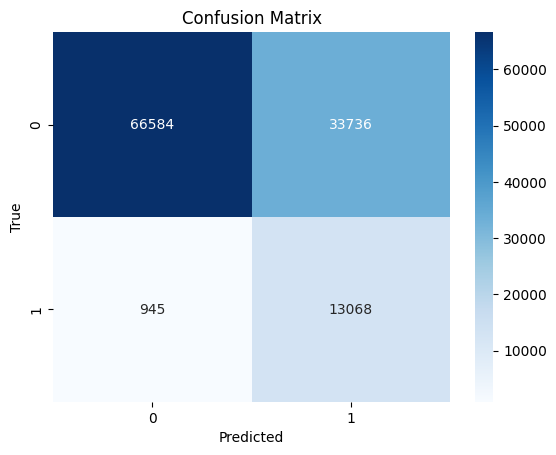

Precision: 0.2792
Recall: 0.9326


 ANALISI MODELLO: Logistic SMOTE

Soglia ottimale: 0.22 - F1 Score: 0.4518
Cross-Validation (cv=5)
Media Precision: 0.3142
Media Recall: 0.0026


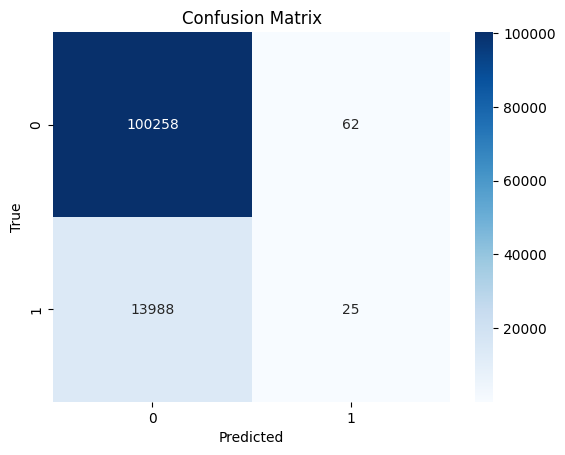

Precision: 0.2874
Recall: 0.0018


In [73]:
# === ANALISI APPROFONDITA DEI MODELLI MIGLIORI ===

# Definiamo i modelli da approfondire
modelli_finali = {
    "Logistic Balanced": build_model(clf_best_lr, pre),
    "Logistic SMOTE": build_model(clf_smote, pre),
}

# Fit + tuning soglia + CV + confusion matrix
for nome, pipe in modelli_finali.items():
    print(f"\n\n ANALISI MODELLO: {nome}")
    pipe.fit(X_train, Y_train)

    # Tuning soglia F1
    best_threshold = tune_threshold(pipe, X_test, Y_test)

    # Cross-validation su X_train
    cross_val_model(pipe, X_train, Y_train)

    # Confusion matrix + heatmap
    plot_confusion_matrix(pipe, X_test, Y_test)


Logistic Balanced:

Questo modello è chiaramente orientato al recall, ovvero identifica correttamente la stragrande maggioranza dei clienti che risponderanno positivamente (classe 1), riducendo al minimo i falsi negativi. Tuttavia, lo fa al costo di molti falsi positivi: circa 34.000 persone vengono etichettate erroneamente come interessate, mentre in realtà non lo sono. È una strategia aggressiva, ma utile in contesti dove l’obiettivo è massimizzare l’identificazione dei clienti potenzialmente interessati, anche a costo di sprecare risorse nel contattarli.

Logistic con SMOTE:
Nonostante un F1 Score simile, il modello SMOTE ha un comportamento completamente diverso: non riesce quasi mai a identificare la classe positiva. Il recall è praticamente nullo (0.18%), il che significa che quasi tutti i clienti potenzialmente interessati vengono ignorati (13.988 falsi negativi su 14.013). Questo rende il modello inutile per un’azione commerciale, perché il suo unico pregio è un'ottima identificazione della classe 0, che però non è utile per l’obiettivo del cross-selling.

In [75]:
# === VALUTAZIONE SU INTERO DATASET ===

final_model = build_model(clf_best_lr, pre)
final_model.fit(X_train, Y_train)

print("\n\n VALUTAZIONE FINALE SU INTERO DATASET")
evaluate_on_full(final_model, pd.concat([X_train, X_test]), pd.concat([Y_train, Y_test]))




 VALUTAZIONE FINALE SU INTERO DATASET
=== Valutazione su intero dataset ===
ROC AUC: 0.8497
F1 Score: 0.4294
Confusion Matrix:
 [[221402 112997]
 [  3045  43665]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    334399
           1       0.28      0.93      0.43     46710

    accuracy                           0.70    381109
   macro avg       0.63      0.80      0.61    381109
weighted avg       0.90      0.70      0.75    381109



Metriche principali:

ROC AUC: 0.8497 → indica un’eccellente capacità discriminativa tra le due classi.
F1 Score globale: 0.4294 → bilancio tra precision e recall sulla classe positiva (1).
Accuracy complessiva: 70%

Precision classe 1: 0.28 → circa il 28% dei positivi predetti sono corretti
Recall classe 1: 0.93 → circa il 93% dei clienti interessati è stato individuato

Il modello mantiene un approccio fortemente orientato al recall, coerente con le valutazioni precedenti. Raggiunge quasi il massimo recupero possibile dei clienti potenzialmente interessati (93%), sacrificando però la precisione, che rimane bassa (28%). Questo è un trade-off volontario e strategico: nel contesto del cross-selling assicurativo, può essere molto più rischioso perdere un cliente interessato (FN) che contattarne uno disinteressato (FP).

L’elevato numero di falsi positivi (112.995) indica che il modello predice interesse in modo generoso, ma accettabile se il costo di contatto è contenuto e se il ritorno da una conversione è elevato. Allo stesso tempo, il fatto che i falsi negativi siano solo 3.044 su 46.710 è un segnale di eccellente capacità predittiva per l'obiettivo primario: massimizzare il recupero della classe positiva.